In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data=pd.read_csv(r"https://raw.githubusercontent.com/simmran2003/Recommendation-System/main/data.csv")
data_artist=pd.read_csv(r"https://raw.githubusercontent.com/simmran2003/Recommendation-System/main/data_by_artist.csv")
data_genre=pd.read_csv(r"https://raw.githubusercontent.com/simmran2003/Recommendation-System/main/data_by_genres.csv")
data_year=pd.read_csv(r"https://raw.githubusercontent.com/simmran2003/Recommendation-System/main/data_by_year.csv")
data_w_genre=pd.read_csv(r"https://raw.githubusercontent.com/simmran2003/Recommendation-System/main/data_w_genres.csv")

In [3]:
list(data["name"])

['Piano Concerto No. 3 in D Minor, Op. 30: III. Finale. Alla breve',
 'Clancy Lowered the Boom',
 'Gati Bali',
 'Danny Boy',
 'When Irish Eyes Are Smiling',
 'Gati Mardika',
 'The Wearing of the Green',
 'Morceaux de fantaisie, Op. 3: No. 2, Prélude in C-Sharp Minor. Lento',
 'La Mañanita - Remasterizado',
 'Il Etait Syndiqué',
 "Dans La Vie Faut Pas S'en Faire",
 'Por Que Me Dejaste - Remasterizado',
 'La Vipère',
 'Ud Taksimi',
 'Power Is Power',
 '10 Préludes, Op. 23: No. 5 in G Minor. Alla marcia',
 'Come Back To Erin',
 'Rákóczy March',
 'When We Die',
 'A Ballynure Ballad',
 'Je Suis Toujours La',
 'Mother Machree',
 'Flor Marchita - Remasterizado',
 'İmtidadı Aşkıma',
 'Ney Taksimi',
 'Morceaux de fantaisie, Op. 3: No. 2, Prélude in C-Sharp Minor. Lento',
 "Je M'donne",
 'Korkma Sönmez',
 'La Victoire De La Madelon',
 'Por Ella - Remasterizado',
 'A Mi Palomita - Remasterizado',
 'Amurado Me Dejaste - Remasterizado',
 'Raja Manggala',
 'Eşin Var âşiyâ Var',
 'Bir Zamanlar Bizde 

In [4]:
data.head()

valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH          0.000028   
4       166693   0.193         0  4d6HGyGT8e121BsdKmw9v6          0.000002   

   key  liveness  loudness  mode  \
0   10     0.665   -20.096     1   
1    7     0.160   -12.441     1   
2    3     0.101   -14.850     1   
3    5     0.381    -9.316     1   
4    3     0.229   -10.096     1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4         1921   
1                            Clancy Lowered the Boom           5         1921   
2                                          Gati Bali           5         1921   
3                                          Danny Boy           3         1921   
4                        When Irish Eyes Are Smiling           2         1921   

   speechiness    tempo  
0       0.0366   80.954  
1       0.4150   60.936  
2       0.0339  110.339  
3       0.0354  100.109  
4       0.0380  101.665

In [5]:
data_artist.head()

mode  count  acousticness  \
0     1      9      0.590111   
1     1     26      0.862538   
2     1      7      0.856571   
3     1     27      0.884926   
4     1      7      0.510714   

                                             artists  danceability  \
0                   "Cats" 1981 Original London Cast      0.467222   
1                          "Cats" 1983 Broadway Cast      0.441731   
2        "Fiddler On The Roof” Motion Picture Chorus      0.348286   
3     "Fiddler On The Roof” Motion Picture Orchestra      0.425074   
4  "Joseph And The Amazing Technicolor Dreamcoat"...      0.467143   

     duration_ms    energy  instrumentalness  liveness   loudness  \
0  250318.555556  0.394003          0.011400  0.290833 -14.448000   
1  287280.000000  0.406808          0.081158  0.315215 -10.690000   
2  328920.000000  0.286571          0.024593  0.325786 -15.230714   
3  262890.962963  0.245770          0.073587  0.275481 -15.639370   
4  270436.142857  0.488286          0.009400  0.195000 -10.236714   

   speechiness       tempo   valence  popularity  key  
0     0.210389  117.518111  0.389500   38.333333    5  
1     0.176212  103.044154  0.268865   30.576923    5  
2     0.118514   77.375857  0.354857   34.857143    0  
3     0.123200   88.667630  0.372030   34.851852    0  
4     0.098543  122.835857  0.482286   43.000000    5

In [6]:
data_genre.head()

mode                  genres  acousticness  danceability   duration_ms  \
0     1  21st century classical      0.979333      0.162883  1.602977e+05   
1     1                   432hz      0.494780      0.299333  1.048887e+06   
2     1                   8-bit      0.762000      0.712000  1.151770e+05   
3     1                      []      0.651417      0.529093  2.328809e+05   
4     1              a cappella      0.676557      0.538961  1.906285e+05   

     energy  instrumentalness  liveness   loudness  speechiness       tempo  \
0  0.071317          0.606834  0.361600 -31.514333     0.040567   75.336500   
1  0.450678          0.477762  0.131000 -16.854000     0.076817  120.285667   
2  0.818000          0.876000  0.126000  -9.180000     0.047000  133.444000   
3  0.419146          0.205309  0.218696 -12.288965     0.107872  112.857352   
4  0.316434          0.003003  0.172254 -12.479387     0.082851  112.110362   

    valence  popularity  key  
0  0.103783   27.833333    6  
1  0.221750   52.500000    5  
2  0.975000   48.000000    7  
3  0.513604   20.859882    7  
4  0.448249   45.820071    7

In [7]:
data_year.head()

mode  year  acousticness  danceability    duration_ms    energy  \
0     1  1921      0.886896      0.418597  260537.166667  0.231815   
1     1  1922      0.938592      0.482042  165469.746479  0.237815   
2     1  1923      0.957247      0.577341  177942.362162  0.262406   
3     1  1924      0.940200      0.549894  191046.707627  0.344347   
4     1  1925      0.962607      0.573863  184986.924460  0.278594   

   instrumentalness  liveness   loudness  speechiness       tempo   valence  \
0          0.344878  0.205710 -17.048667     0.073662  101.531493  0.379327   
1          0.434195  0.240720 -19.275282     0.116655  100.884521  0.535549   
2          0.371733  0.227462 -14.129211     0.093949  114.010730  0.625492   
3          0.581701  0.235219 -14.231343     0.092089  120.689572  0.663725   
4          0.418297  0.237668 -14.146414     0.111918  115.521921  0.621929   

   popularity  key  
0    0.653333    2  
1    0.140845   10  
2    5.389189    0  
3    0.661017   10  
4    2.604317    5

In [8]:
data_w_genre.head()

genres                                            artists  \
0  ['show tunes']                   "Cats" 1981 Original London Cast   
1              []                          "Cats" 1983 Broadway Cast   
2              []        "Fiddler On The Roof” Motion Picture Chorus   
3              []     "Fiddler On The Roof” Motion Picture Orchestra   
4              []  "Joseph And The Amazing Technicolor Dreamcoat"...   

   acousticness  danceability    duration_ms    energy  instrumentalness  \
0      0.590111      0.467222  250318.555556  0.394003          0.011400   
1      0.862538      0.441731  287280.000000  0.406808          0.081158   
2      0.856571      0.348286  328920.000000  0.286571          0.024593   
3      0.884926      0.425074  262890.962963  0.245770          0.073587   
4      0.510714      0.467143  270436.142857  0.488286          0.009400   

   liveness   loudness  speechiness       tempo   valence  popularity  key  \
0  0.290833 -14.448000     0.210389  117.518111  0.389500   38.333333    5   
1  0.315215 -10.690000     0.176212  103.044154  0.268865   30.576923    5   
2  0.325786 -15.230714     0.118514   77.375857  0.354857   34.857143    0   
3  0.275481 -15.639370     0.123200   88.667630  0.372030   34.851852    0   
4  0.195000 -10.236714     0.098543  122.835857  0.482286   43.000000    5   

   mode  count  
0     1      9  
1     1     26  
2     1      7  
3     1     27  
4     1      7

**Data Genre Analysis**

In [9]:
data_genre.head()

mode                  genres  acousticness  danceability   duration_ms  \
0     1  21st century classical      0.979333      0.162883  1.602977e+05   
1     1                   432hz      0.494780      0.299333  1.048887e+06   
2     1                   8-bit      0.762000      0.712000  1.151770e+05   
3     1                      []      0.651417      0.529093  2.328809e+05   
4     1              a cappella      0.676557      0.538961  1.906285e+05   

     energy  instrumentalness  liveness   loudness  speechiness       tempo  \
0  0.071317          0.606834  0.361600 -31.514333     0.040567   75.336500   
1  0.450678          0.477762  0.131000 -16.854000     0.076817  120.285667   
2  0.818000          0.876000  0.126000  -9.180000     0.047000  133.444000   
3  0.419146          0.205309  0.218696 -12.288965     0.107872  112.857352   
4  0.316434          0.003003  0.172254 -12.479387     0.082851  112.110362   

    valence  popularity  key  
0  0.103783   27.833333    6  
1  0.221750   52.500000    5  
2  0.975000   48.000000    7  
3  0.513604   20.859882    7  
4  0.448249   45.820071    7

In [10]:
data_genre.shape

(2973, 14)

In [11]:
data_genre["key"].value_counts()

key
7     694
11    330
9     318
2     285
5     249
1     213
0     210
6     189
10    153
4     148
8      94
3      90
Name: count, dtype: int64

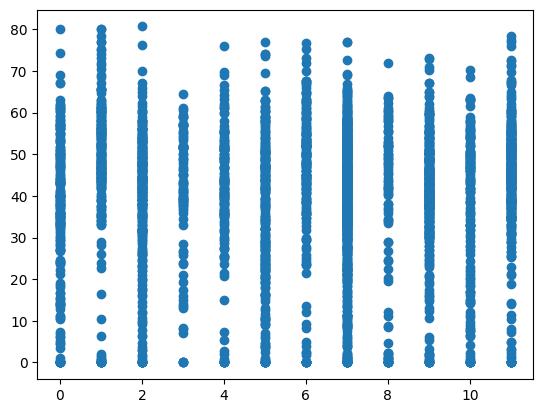

In [12]:
plt.scatter(data_genre["key"],data_genre["popularity"])
plt.show()

In [13]:
data_genre.columns

Index(['mode', 'genres', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'popularity', 'key'],
      dtype='object')

Text(0.5, 1.0, 'speechiness')

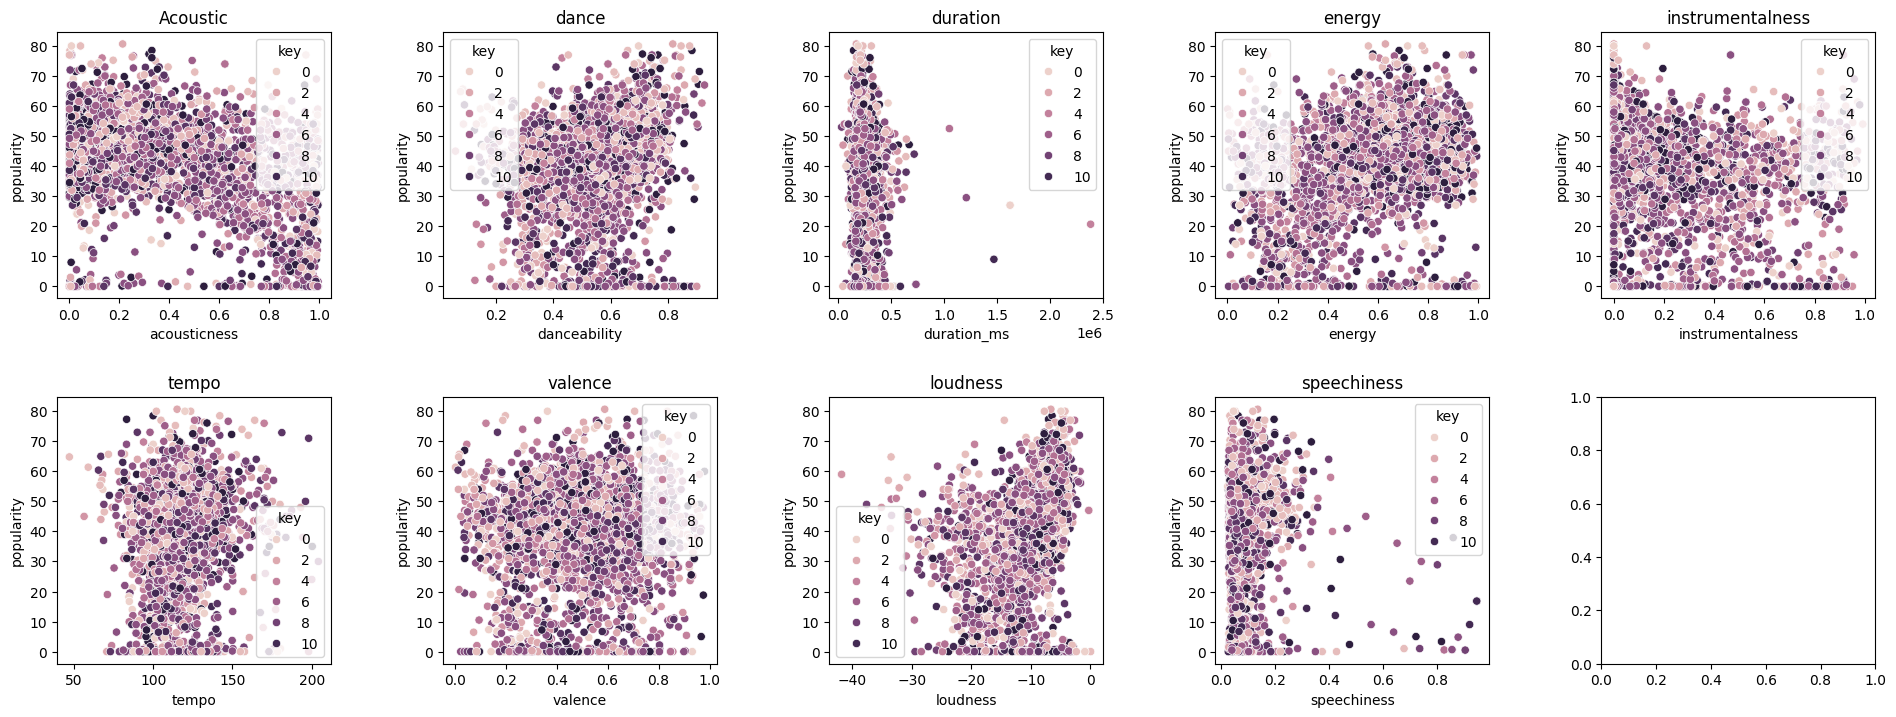

In [14]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
fig.tight_layout(pad=5.0)

sns.scatterplot(data=data_genre, x="acousticness", y="popularity", hue="key", ax=axes[0, 0])
axes[0, 0].set_title('Acoustic')

sns.scatterplot(data=data_genre, x="danceability", y="popularity", hue="key", ax=axes[0, 1])
axes[0, 1].set_title('dance')


sns.scatterplot(data=data_genre, x="duration_ms", y="popularity", hue="key", ax=axes[0, 2])
axes[0, 2].set_title('duration')

# Row 1, Column 4: Histogram
sns.scatterplot(data=data_genre, x="energy", y="popularity", hue="key", ax=axes[0, 3])
axes[0, 3].set_title('energy')

sns.scatterplot(data=data_genre, x="instrumentalness", y="popularity", hue="key", ax=axes[0, 4])
axes[0, 4].set_title('instrumentalness')

sns.scatterplot(data=data_genre, x="tempo", y="popularity", hue="key", ax=axes[1, 0])
axes[1,0].set_title('tempo')

sns.scatterplot(data=data_genre, x="valence", y="popularity", hue="key", ax=axes[1, 1])
axes[1,1].set_title('valence')

sns.scatterplot(data=data_genre, x="loudness", y="popularity", hue="key", ax=axes[1, 2])
axes[1,2].set_title('loudness')

sns.scatterplot(data=data_genre, x="speechiness", y="popularity", hue="key", ax=axes[1, 3])
axes[1,3].set_title('speechiness')

In [15]:
data_genre["key"].value_counts()

key
7     694
11    330
9     318
2     285
5     249
1     213
0     210
6     189
10    153
4     148
8      94
3      90
Name: count, dtype: int64

1)key doesn't have any relation with any of the genre features
2)

<ipython-input-16-41fe4f35bbe1>:4: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(data=data_genre, x="acousticness", y="popularity", hue="key", ax=axes[0, 0])
<ipython-input-16-41fe4f35bbe1>:7: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(data=data_genre, x="danceability", y="popularity", hue="key", ax=axes[0, 1])
<ipython-input-16-41fe4f35bbe1>:11: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(data=data_genre, x="duration_ms", y="popularity", hue="key", ax=axes[0, 2])
<ipython-input-16-41fe4f35bbe1>:14: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(data=data_genre, x="energy", y="popularity", hue="key", ax=axes[0, 3])
<ipython-input-16-41fe4f35bbe1>:17: UserWarning: Ignoring `ax`; jointplot is a figure-level function.
  sns.jointplot(data=data_genre, x="instrumentalness", y="popularity", hue="key", ax=axes[0, 4])
<ipython-input-16-41fe4f35bbe1

Text(0.5, 1.0, 'speechiness')

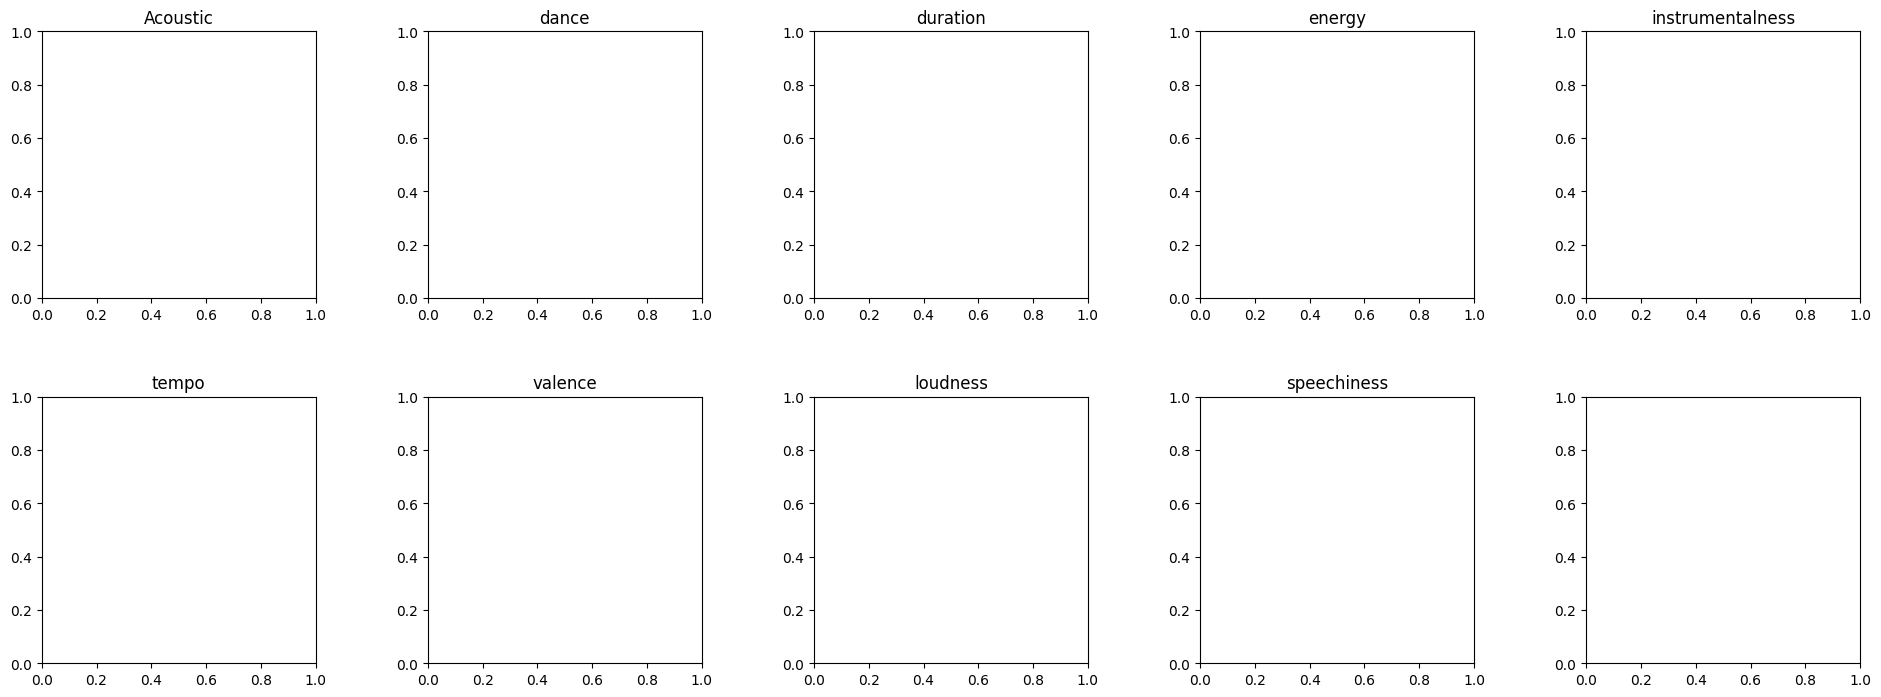

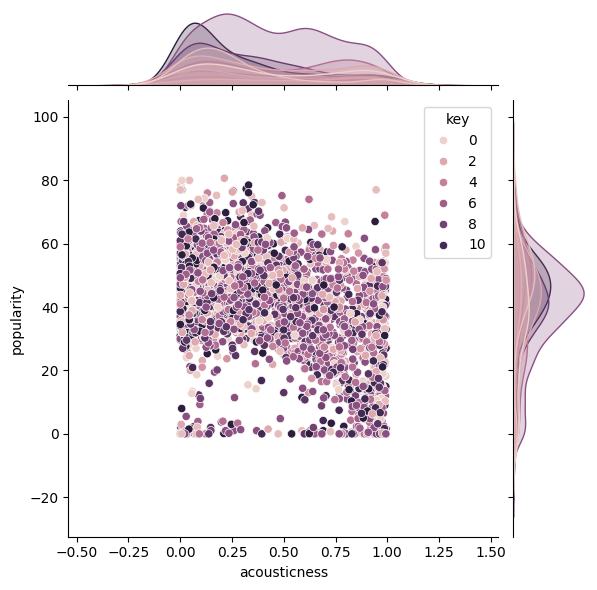

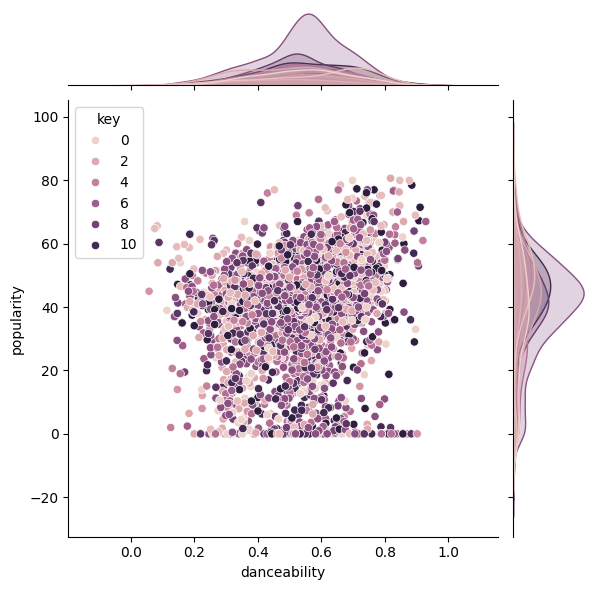

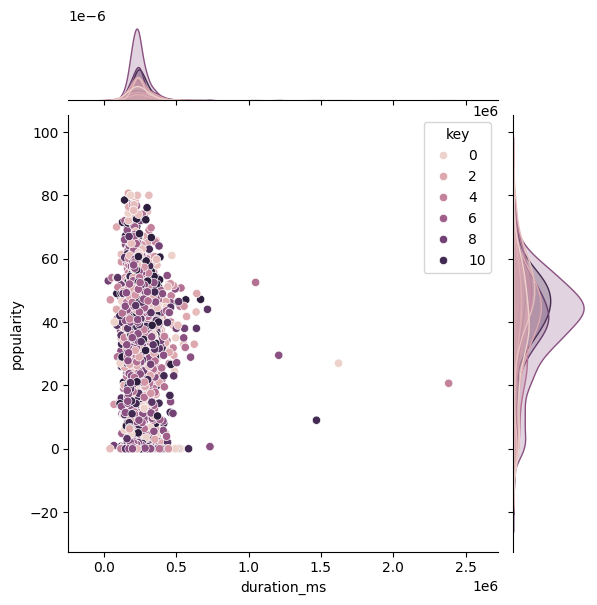

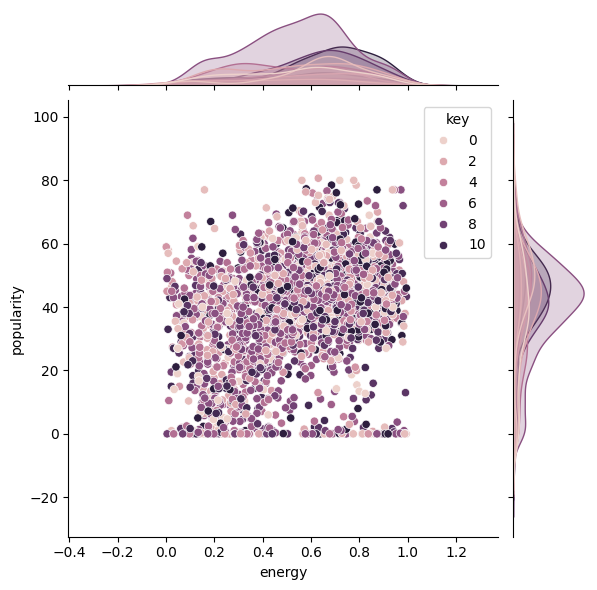

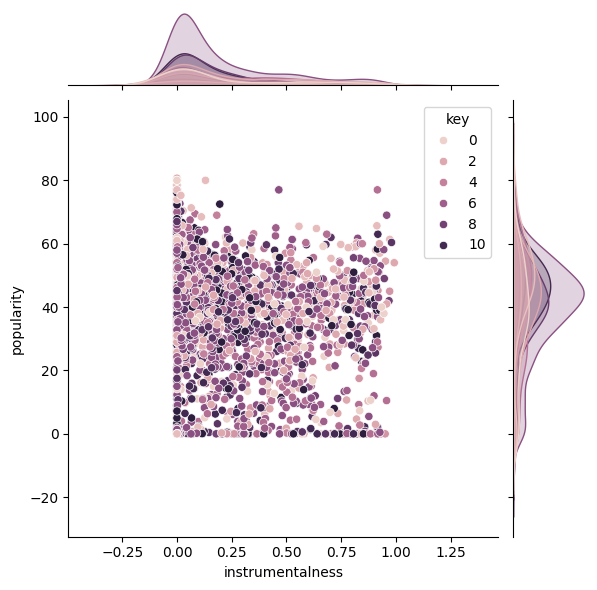

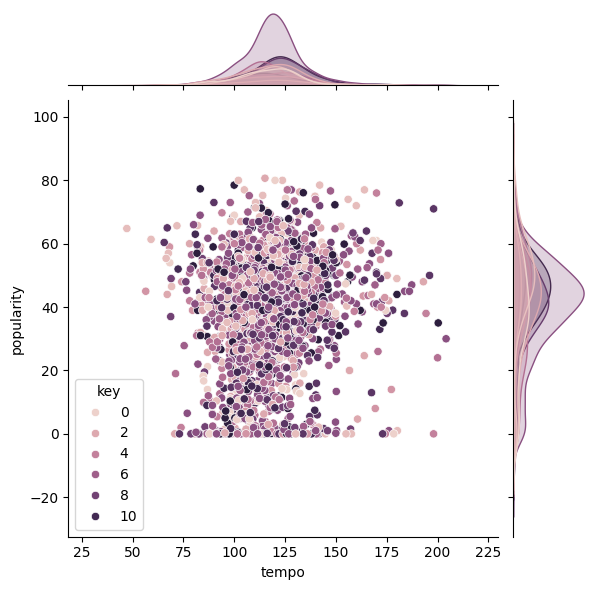

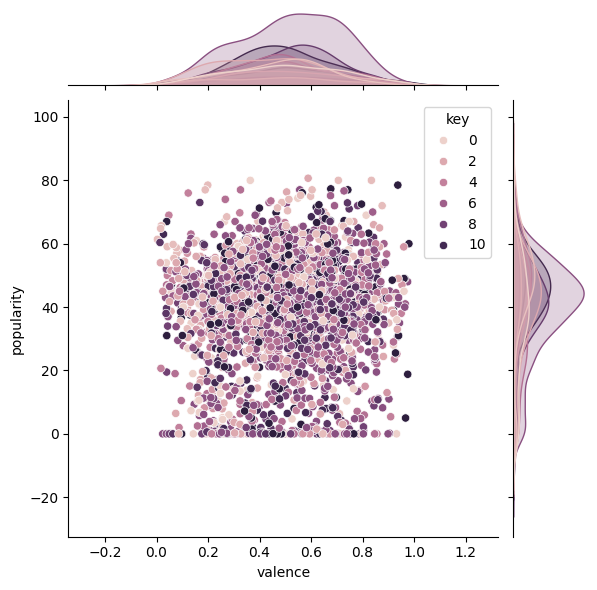

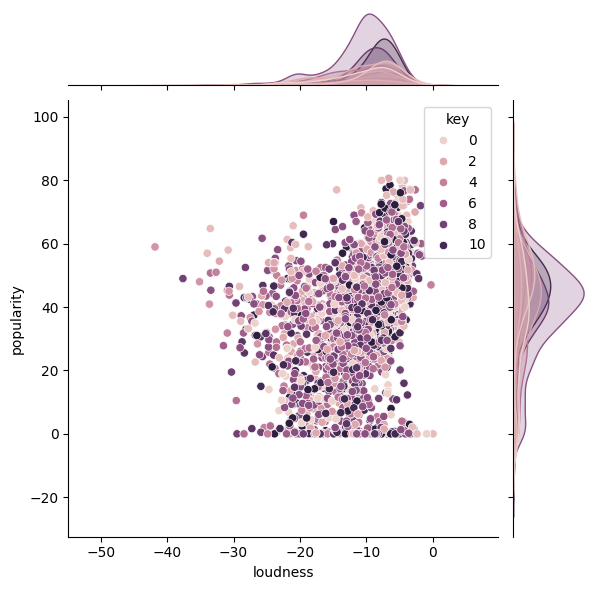

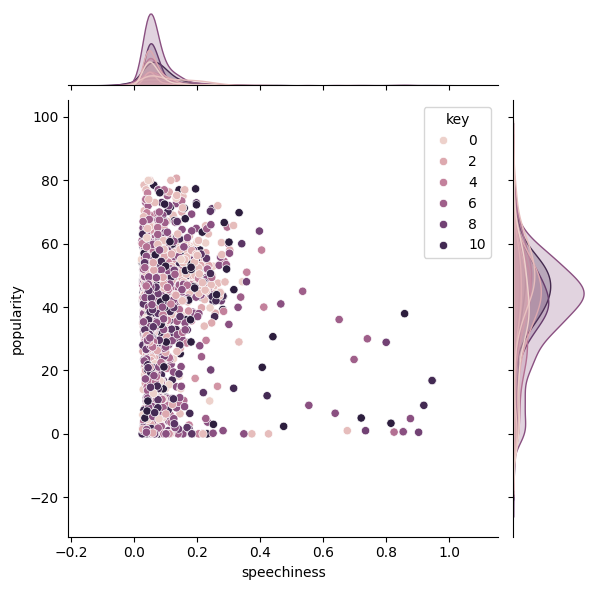

In [16]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
fig.tight_layout(pad=5.0)

sns.jointplot(data=data_genre, x="acousticness", y="popularity", hue="key", ax=axes[0, 0])
axes[0, 0].set_title('Acoustic')

sns.jointplot(data=data_genre, x="danceability", y="popularity", hue="key", ax=axes[0, 1])
axes[0, 1].set_title('dance')


sns.jointplot(data=data_genre, x="duration_ms", y="popularity", hue="key", ax=axes[0, 2])
axes[0, 2].set_title('duration')

sns.jointplot(data=data_genre, x="energy", y="popularity", hue="key", ax=axes[0, 3])
axes[0, 3].set_title('energy')

sns.jointplot(data=data_genre, x="instrumentalness", y="popularity", hue="key", ax=axes[0, 4])
axes[0, 4].set_title('instrumentalness')

sns.jointplot(data=data_genre, x="tempo", y="popularity", hue="key", ax=axes[1, 0])
axes[1,0].set_title('tempo')

sns.jointplot(data=data_genre, x="valence", y="popularity", hue="key", ax=axes[1, 1])
axes[1,1].set_title('valence')

sns.jointplot(data=data_genre, x="loudness", y="popularity", hue="key", ax=axes[1, 2])
axes[1,2].set_title('loudness')

sns.jointplot(data=data_genre, x="speechiness", y="popularity", hue="key", ax=axes[1, 3])
axes[1,3].set_title('speechiness')

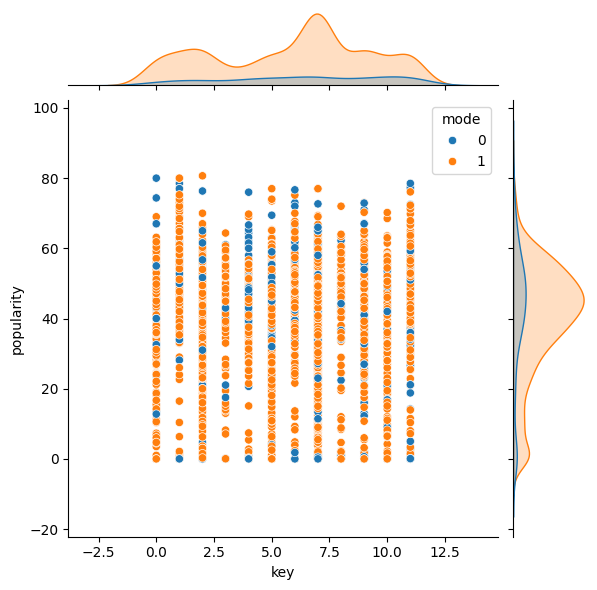

In [17]:
sns.jointplot(x="key",y="popularity",hue="mode",data=data_genre)

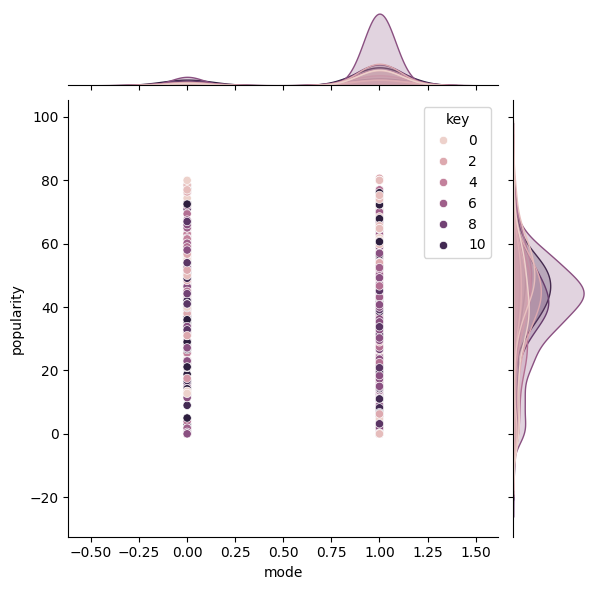

In [18]:
sns.jointplot(x="mode",y="popularity",hue="key",data=data_genre)

In [19]:
from sklearn.decomposition import PCA

**Simmran's Area
(Do not enter)**


In [20]:
data.head()

valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH          0.000028   
4       166693   0.193         0  4d6HGyGT8e121BsdKmw9v6          0.000002   

   key  liveness  loudness  mode  \
0   10     0.665   -20.096     1   
1    7     0.160   -12.441     1   
2    3     0.101   -14.850     1   
3    5     0.381    -9.316     1   
4    3     0.229   -10.096     1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4         1921   
1                            Clancy Lowered the Boom           5         1921   
2                                          Gati Bali           5         1921   
3                                          Danny Boy           3         1921   
4                        When Irish Eyes Are Smiling           2         1921   

   speechiness    tempo  
0       0.0366   80.954  
1       0.4150   60.936  
2       0.0339  110.339  
3       0.0354  100.109  
4       0.0380  101.665

In [21]:
data_copy = data

In [22]:
data_copy.head()

valence  year  acousticness  \
0   0.0594  1921         0.982   
1   0.9630  1921         0.732   
2   0.0394  1921         0.961   
3   0.1650  1921         0.967   
4   0.2530  1921         0.957   

                                             artists  danceability  \
0  ['Sergei Rachmaninoff', 'James Levine', 'Berli...         0.279   
1                                     ['Dennis Day']         0.819   
2  ['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...         0.328   
3                                   ['Frank Parker']         0.275   
4                                     ['Phil Regan']         0.418   

   duration_ms  energy  explicit                      id  instrumentalness  \
0       831667   0.211         0  4BJqT0PrAfrxzMOxytFOIz          0.878000   
1       180533   0.341         0  7xPhfUan2yNtyFG0cUWkt8          0.000000   
2       500062   0.166         0  1o6I8BglA6ylDMrIELygv1          0.913000   
3       210000   0.309         0  3ftBPsC5vPBKxYSee08FDH          0.000028   
4       166693   0.193         0  4d6HGyGT8e121BsdKmw9v6          0.000002   

   key  liveness  loudness  mode  \
0   10     0.665   -20.096     1   
1    7     0.160   -12.441     1   
2    3     0.101   -14.850     1   
3    5     0.381    -9.316     1   
4    3     0.229   -10.096     1   

                                                name  popularity release_date  \
0  Piano Concerto No. 3 in D Minor, Op. 30: III. ...           4         1921   
1                            Clancy Lowered the Boom           5         1921   
2                                          Gati Bali           5         1921   
3                                          Danny Boy           3         1921   
4                        When Irish Eyes Are Smiling           2         1921   

   speechiness    tempo  
0       0.0366   80.954  
1       0.4150   60.936  
2       0.0339  110.339  
3       0.0354  100.109  
4       0.0380  101.665

In [23]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [24]:
data_copy.drop('artists',axis = "columns",inplace=True)
data_copy.drop('id',axis = "columns",inplace=True)
data_copy.drop('name',axis = "columns",inplace=True)
data_copy.drop('release_date',axis = "columns",inplace=True)


In [25]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   danceability      170653 non-null  float64
 4   duration_ms       170653 non-null  int64  
 5   energy            170653 non-null  float64
 6   explicit          170653 non-null  int64  
 7   instrumentalness  170653 non-null  float64
 8   key               170653 non-null  int64  
 9   liveness          170653 non-null  float64
 10  loudness          170653 non-null  float64
 11  mode              170653 non-null  int64  
 12  popularity        170653 non-null  int64  
 13  speechiness       170653 non-null  float64
 14  tempo             170653 non-null  float64
dtypes: float64(9), int64(6)
memory usage: 19.5 MB


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test = train_test_split(data_copy.drop('key',axis=1),
                                                 data_copy['key'],test_size = 0.3,random_state=0)
X_train.shape,X_test.shape

((119457, 14), (51196, 14))

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [30]:
np.round(X_train.describe(),1)

valence      year  acousticness  danceability  duration_ms    energy  \
count  119457.0  119457.0      119457.0      119457.0     119457.0  119457.0   
mean        0.5    1976.7           0.5           0.5     230573.1       0.5   
std         0.3      25.9           0.4           0.2     123588.4       0.3   
min         0.0    1921.0           0.0           0.0       5991.0       0.0   
25%         0.3    1956.0           0.1           0.4     169667.0       0.3   
50%         0.5    1977.0           0.5           0.5     207320.0       0.5   
75%         0.7    1999.0           0.9           0.7     262360.0       0.7   
max         1.0    2020.0           1.0           1.0    4270034.0       1.0   

       explicit  instrumentalness  liveness  loudness      mode  popularity  \
count  119457.0          119457.0  119457.0  119457.0  119457.0    119457.0   
mean        0.1               0.2       0.2     -11.5       0.7        31.4   
std         0.3               0.3       0.2       5.7       0.5        21.8   
min         0.0               0.0       0.0     -60.0       0.0         0.0   
25%         0.0               0.0       0.1     -14.6       0.0        11.0   
50%         0.0               0.0       0.1     -10.6       1.0        33.0   
75%         0.0               0.1       0.3      -7.2       1.0        48.0   
max         1.0               1.0       1.0       3.9       1.0       100.0   

       speechiness     tempo  
count     119457.0  119457.0  
mean           0.1     116.8  
std            0.2      30.7  
min            0.0       0.0  
25%            0.0      93.4  
50%            0.0     114.7  
75%            0.1     135.5  
max            1.0     224.4

In [31]:
np.round(X_train_scaled.describe(),1)

valence      year  acousticness  danceability  duration_ms    energy  \
count  119457.0  119457.0      119457.0      119457.0     119457.0  119457.0   
mean        0.0       0.0           0.0          -0.0          0.0      -0.0   
std         1.0       1.0           1.0           1.0          1.0       1.0   
min        -2.0      -2.1          -1.3          -3.1         -1.8      -1.8   
25%        -0.8      -0.8          -1.1          -0.7         -0.5      -0.8   
50%         0.0       0.0           0.0           0.1         -0.2      -0.0   
75%         0.8       0.9           1.0           0.7          0.3       0.8   
max         1.8       1.7           1.3           2.6         32.7       1.9   

       explicit  instrumentalness  liveness  loudness      mode  popularity  \
count  119457.0          119457.0  119457.0  119457.0  119457.0    119457.0   
mean        0.0              -0.0      -0.0       0.0       0.0        -0.0   
std         1.0               1.0       1.0       1.0       1.0         1.0   
min        -0.3              -0.5      -1.2      -8.5      -1.6        -1.4   
25%        -0.3              -0.5      -0.6      -0.6      -1.6        -0.9   
50%        -0.3              -0.5      -0.4       0.2       0.6         0.1   
75%        -0.3              -0.2       0.3       0.8       0.6         0.8   
max         3.3               2.7       4.6       2.7       0.6         3.1   

       speechiness     tempo  
count     119457.0  119457.0  
mean          -0.0       0.0  
std            1.0       1.0  
min           -0.6      -3.8  
25%           -0.4      -0.8  
50%           -0.3      -0.1  
75%           -0.1       0.6  
max            5.3       3.5

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
clf = DecisionTreeClassifier()

In [34]:
clf.fit(data_copy.drop('key',axis=1),data_copy['key'])

DecisionTreeClassifier()

In [35]:
# from sklearn.tree import plot_tree
# plot_tree(clf)

In [36]:
result = clf.feature_importances_
print(result)
result.shape

[0.09012636 0.06640528 0.09029355 0.08805831 0.09186191 0.08281959
 0.00284889 0.07031992 0.08658046 0.08588875 0.00456121 0.05802523
 0.09130145 0.09090907]


(14,)

In [37]:
new_data = data_copy.drop("key",axis='columns')
X = new_data.columns
print(X)
X.shape

Index(['valence', 'year', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'explicit', 'instrumentalness', 'liveness', 'loudness',
       'mode', 'popularity', 'speechiness', 'tempo'],
      dtype='object')


(14,)

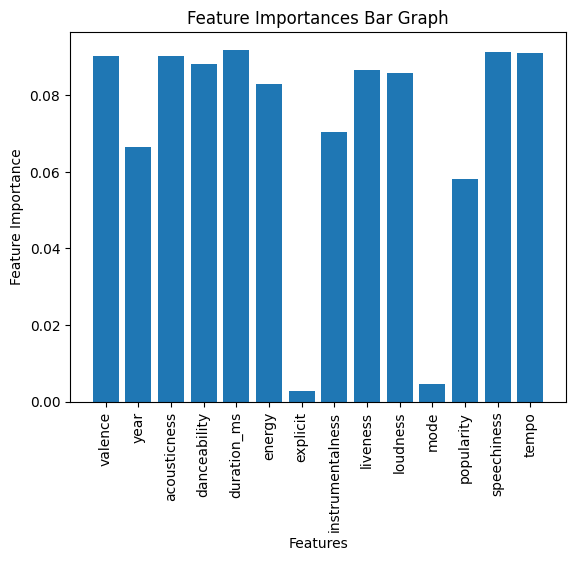

In [38]:
import matplotlib.pyplot as plt
plt.bar(X,result)
plt.title("Feature Importances Bar Graph")
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.xticks(np.arange(0, 14),rotation='vertical')
plt.show()

In [39]:
fig1 = px.scatter_3d(data_copy, x='popularity', y='valence', z='tempo', color=data_copy["key"], symbol=data_copy["key"], size_max=10)
fig1.update_layout(title='3D Cluster Plot', scene=dict(xaxis_title='PC1', yaxis_title='PC2', zaxis_title='PC3'))
fig1.show()

Key is not a good feature to be considered

In [40]:
data.head()

valence  year  acousticness  danceability  duration_ms  energy  explicit  \
0   0.0594  1921         0.982         0.279       831667   0.211         0   
1   0.9630  1921         0.732         0.819       180533   0.341         0   
2   0.0394  1921         0.961         0.328       500062   0.166         0   
3   0.1650  1921         0.967         0.275       210000   0.309         0   
4   0.2530  1921         0.957         0.418       166693   0.193         0   

   instrumentalness  key  liveness  loudness  mode  popularity  speechiness  \
0          0.878000   10     0.665   -20.096     1           4       0.0366   
1          0.000000    7     0.160   -12.441     1           5       0.4150   
2          0.913000    3     0.101   -14.850     1           5       0.0339   
3          0.000028    5     0.381    -9.316     1           3       0.0354   
4          0.000002    3     0.229   -10.096     1           2       0.0380   

     tempo  
0   80.954  
1   60.936  
2  110.339  
3  100.109  
4  101.665

Text(0.5, 1.0, 'speechiness')

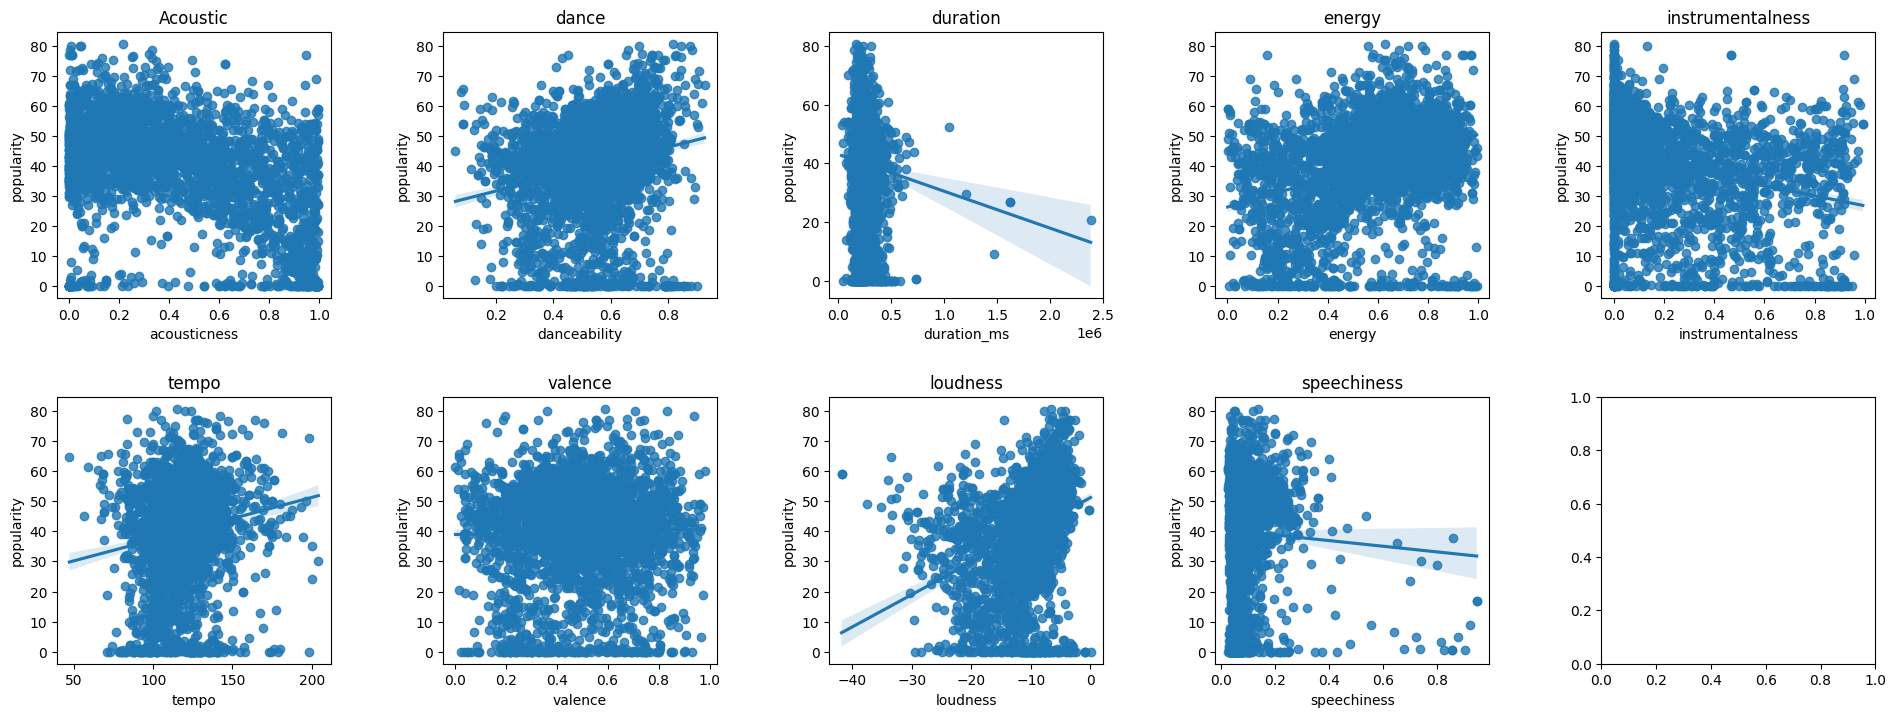

In [41]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
fig.tight_layout(pad=5.0)

sns.regplot(data=data_genre, x="acousticness", y="popularity", ax=axes[0, 0])
axes[0, 0].set_title('Acoustic')

sns.regplot(data=data_genre, x="danceability", y="popularity",  ax=axes[0, 1])
axes[0, 1].set_title('dance')


sns.regplot(data=data_genre, x="duration_ms", y="popularity",  ax=axes[0, 2])
axes[0, 2].set_title('duration')

sns.regplot(data=data_genre, x="energy", y="popularity",  ax=axes[0, 3])
axes[0, 3].set_title('energy')

sns.regplot(data=data_genre, x="instrumentalness", y="popularity", ax=axes[0, 4])
axes[0, 4].set_title('instrumentalness')

sns.regplot(data=data_genre, x="tempo", y="popularity",  ax=axes[1, 0])
axes[1,0].set_title('tempo')

sns.regplot(data=data_genre, x="valence", y="popularity",  ax=axes[1, 1])
axes[1,1].set_title('valence')

sns.regplot(data=data_genre, x="loudness", y="popularity", ax=axes[1, 2])
axes[1,2].set_title('loudness')

sns.regplot(data=data_genre, x="speechiness", y="popularity",  ax=axes[1, 3])
axes[1,3].set_title('speechiness')

In [42]:
data_copy.shape

(170653, 15)

In [43]:
# from sklearn.metrics.pairwise import cosine_similarity
# from sklearn.decomposition import PCA

In [44]:
# pca = PCA(n_components=10)

In [45]:
# reduced_data = pca.fit_transform(data_copy)

In [46]:
# similarity_matrix = cosine_similarity(reduced_data)

In [47]:
# def compute_similarity_in_batches(data, batch_size=1000):
#     n_samples = data.shape[0]
#     similarity_matrix = np.zeros((n_samples, n_samples))

#     for start in range(0, n_samples, batch_size):
#         end = min(start + batch_size, n_samples)
#         batch = data[start:end]
#         similarity_matrix[start:end] = cosine_similarity(batch, data)

#     return similarity_matrix

In [48]:
# similarity_matrix = compute_similarity_in_batches(data_copy, batch_size=1000)

In [49]:
# print(similarity_matrix)

In [50]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)


In [51]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=10)

In [52]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.1501093835455895


In [ ]:
scores = []

for i in range(1,16):

    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(X_train_scaled,y_train)

    y_pred = knn.predict(X_test_scaled)

    scores.append(accuracy_score(y_test, y_pred))

In [ ]:
plt.plot(range(1,16),scores)